In [109]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

In [110]:
col_name='RSI'
ratio_outlier=0.1  # 5% max is 0.5 (50%)
upX=70
downX=30

In [111]:
df = pd.read_csv('data/SET50-Indy-Week.csv',parse_dates=['Date/Time'],dayfirst=True,usecols=['Date/Time',col_name])
df.rename(columns={'Date/Time':'Date'},inplace=True)
df.set_index('Date',inplace=True)
df.head(10)

,RSI
Date,
2009-01-09,41.76
2009-01-16,36.74
2009-01-23,36.28
2009-01-30,37.57
2009-02-06,40.24
2009-02-13,40.61
2009-02-20,37.37
2009-02-27,37.01
2009-03-06,33.83


Text(0.5, 0, 'RSI distribution')

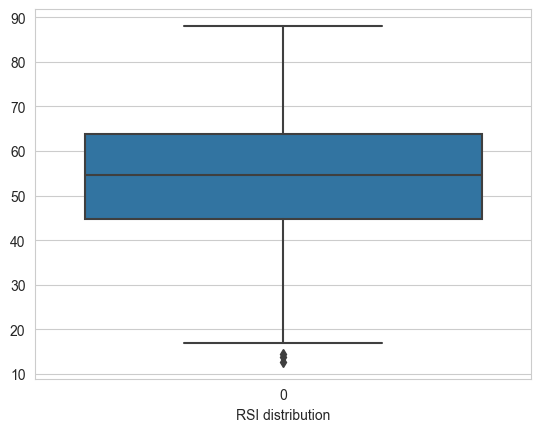

In [112]:
sns.set_style("whitegrid")
ax = sns.boxplot(data=df[col_name])
ax.set_xlabel(f'{col_name} distribution')

In [113]:
#model=IsolationForest(n_estimators=100, max_samples='auto', contamination='auto')  #contamination=float(ratio_outlier)
model=IsolationForest(n_estimators=100, max_samples='auto', contamination=float(ratio_outlier))  
model.fit(df[[col_name]])

df['scores']=model.decision_function(df[[col_name]])
df['anomaly']=model.predict(df[[col_name]])

D:\ProgramData\Anaconda3\envs\ml-ai\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


28
              RSI    scores  anomaly
Date                                
2009-05-29  80.26 -0.001957       -1
2009-06-05  85.87 -0.123497       -1
2009-06-12  88.04 -0.172212       -1
2009-10-02  80.31 -0.006164       -1
2009-10-09  83.09 -0.082385       -1
2010-04-02  77.68 -0.002099       -1
2010-09-24  81.17 -0.034041       -1
2010-10-01  84.43 -0.106185       -1
2010-10-08  77.35 -0.004285       -1
2010-10-15  81.74 -0.053636       -1
2010-10-22  77.79 -0.003087       -1
2010-11-05  80.76 -0.022142       -1
2013-02-01  83.46 -0.087658       -1
2013-02-08  77.71 -0.002838       -1
2013-02-22  80.79 -0.023292       -1
2013-03-08  82.19 -0.059094       -1
2013-03-15  85.02 -0.111993       -1
2017-09-08  78.52 -0.001924       -1
2017-09-15  82.68 -0.072901       -1
2017-09-29  81.55 -0.046733       -1
2017-10-06  84.15 -0.103431       -1
2017-10-12  86.30 -0.131460       -1
2017-12-22  78.40 -0.005748       -1
2018-01-05  85.05 -0.111993       -1
2018-01-12  86.13 -0.128337       -

<AxesSubplot: xlabel='RSI', ylabel='Count'>

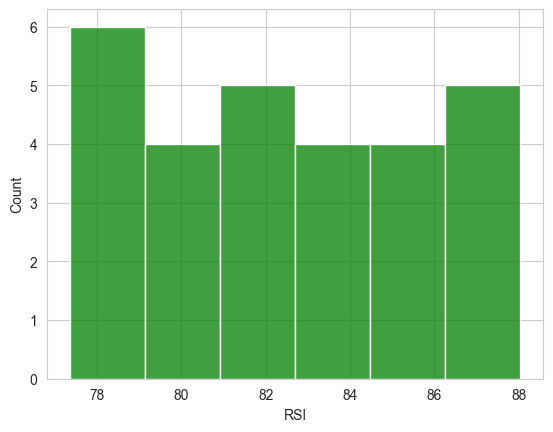

In [114]:
upAnomaly=df.query(f'anomaly==-1 and {col_name}>@upX')
print(len(upAnomaly))
print(upAnomaly)
sns.set_style('whitegrid')
sns.histplot(upAnomaly[col_name], kde = False, color ='green')

31
              RSI    scores  anomaly
Date                                
2011-09-30  26.85 -0.058918       -1
2011-10-07  26.81 -0.058918       -1
2013-08-30  28.97 -0.047821       -1
2014-01-03  25.76 -0.073208       -1
2015-07-24  28.92 -0.049424       -1
2015-08-07  29.20 -0.050039       -1
2015-08-14  26.78 -0.059734       -1
2015-08-21  20.01 -0.150594       -1
2015-08-28  24.35 -0.076570       -1
2015-09-04  24.09 -0.081191       -1
2015-09-11  27.00 -0.058511       -1
2015-09-25  27.47 -0.056883       -1
2015-10-02  22.80 -0.112954       -1
2015-12-11  25.12 -0.072325       -1
2015-12-18  24.76 -0.072523       -1
2015-12-25  24.54 -0.076263       -1
2015-12-30  24.27 -0.079231       -1
2016-01-08  18.76 -0.168295       -1
2016-01-15  18.20 -0.172294       -1
2016-01-22  29.06 -0.048622       -1
2018-06-22  25.01 -0.073576       -1
2018-06-29  22.04 -0.125701       -1
2018-07-06  27.93 -0.056463       -1
2020-02-28  16.90 -0.189452       -1
2020-03-06  22.76 -0.112954       -

<AxesSubplot: xlabel='RSI', ylabel='Count'>

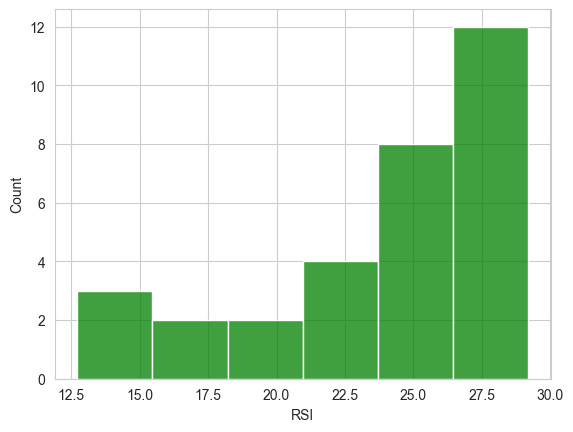

In [115]:
downAnomaly=df.query(f'anomaly==-1 and {col_name}<@downX')
print(len(downAnomaly))
print(downAnomaly)

sns.set_style('whitegrid')
sns.histplot(downAnomaly[col_name], kde = False, color ='green')

In [116]:
all_data=len(df)
all_outlier=len(df.query('anomaly==-1'))
my_outliers=len(upAnomaly)+len(downAnomaly)
                
pct_myOulier=round(my_outliers/all_outlier*100,2)
pct_allOutlier=round(all_outlier/all_data*100,2)
                
print(f"My Accuracy percentage: {my_outliers}/{all_outlier}={pct_myOulier} %")
print(f"Outlier percentage: {all_outlier}/{all_data}={pct_allOutlier} %")

My Accuracy percentage: 59/73=80.82 %
Outlier percentage: 73/730=10.0 %
